# Analyzing Weather Trends Relative to the Equator, Using OpenWeather API
----

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [30]:
weather_api_key

'2eb6865e01332decbf5ca25a1c61cbb5'

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

648

In [10]:
lat_lng

(-72.13955505618581, -73.156291880976)

In [34]:
cities

['tasiilaq',
 'lazarev',
 'north platte',
 'cape town',
 'acapulco',
 'chapaevsk',
 'asau',
 'kapaa',
 'macomb',
 'rikitea',
 'illoqqortoormiut',
 'kamenskoye',
 'albany',
 'gorno-chuyskiy',
 'ushuaia',
 'winslow',
 'luneville',
 'mazagao',
 'kendari',
 'jamestown',
 'salalah',
 'narsaq',
 'butaritari',
 'shingu',
 'kieta',
 'saint-philippe',
 'makakilo city',
 'chuy',
 'gat',
 'svetlogorsk',
 'busselton',
 'bredasdorp',
 'ribeira grande',
 'hailar',
 'one hundred mile house',
 'belushya guba',
 'apahida',
 'mataura',
 'vaini',
 'punta arenas',
 'sitka',
 'new norfolk',
 'benjamin aceval',
 'agadir',
 'saleaula',
 'fortuna',
 'hilo',
 'qaanaaq',
 'airai',
 'hasaki',
 'chimbote',
 'madimba',
 'yerbogachen',
 'provideniya',
 'tessalit',
 'marfino',
 'yellowknife',
 'hualmay',
 'matamoros',
 'upernavik',
 'east london',
 'nizhneyansk',
 'ardakan',
 'chumikan',
 'smithers',
 'nanortalik',
 'atuona',
 'dakar',
 'najran',
 'elizabeth city',
 'bereda',
 'ilulissat',
 'marsh harbour',
 'bluff'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
#Set up base url for API call 
url = "https://api.openweathermap.org/data/2.5/weather?q="
#City= whatever city is in the list....
test = "acapulco"
api_key = "&appid=" + weather_api_key

In [36]:
#Initialize Empty Lists to hold weather data to later put in dataframe, and counter variable
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date_dt =[]
counter = 0
print(counter)

0


In [37]:
#Draft for loop to get all the cities....
for city in cities:
    response = requests.get(url + city + api_key)
    data = response.json()
    try:
        city_name.append(data['name'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date_dt.append(data['dt'])
    except KeyError:
        pass
    counter+=1
    try:
        print(f"Record {counter}. City: {data['name']}, City ID: {data['id']}.")
    except KeyError: 
        print("City not found, skipping...")
    time.sleep(2)

Record 1. City: Tasiilaq, City ID: 3424607.
Record 2. City: Lazarev, City ID: 2123836.
Record 3. City: North Platte, City ID: 5697939.
Record 4. City: Cape Town, City ID: 3369157.
Record 5. City: Acapulco de Juárez, City ID: 3533462.
Record 6. City: Chapaevsk, City ID: 499068.
Record 7. City: Asău, City ID: 686090.
Record 8. City: Kapaa, City ID: 5848280.
Record 9. City: Macomb, City ID: 4900817.
Record 10. City: Rikitea, City ID: 4030556.
City not found, skipping...
City not found, skipping...
Record 13. City: Albany, City ID: 5106841.
City not found, skipping...
Record 15. City: Ushuaia, City ID: 3833367.
Record 16. City: Winslow, City ID: 5321473.
Record 17. City: Lunéville, City ID: 2997110.
Record 18. City: Mazagão, City ID: 3395042.
Record 19. City: Kendari, City ID: 1640344.
Record 20. City: Jamestown, City ID: 5122534.
Record 21. City: Salalah, City ID: 286621.
Record 22. City: Narsaq, City ID: 3421719.
Record 23. City: Butaritari, City ID: 2110227.
Record 24. City: Shingū, Cit

Record 187. City: Carnarvon, City ID: 2074865.
Record 188. City: Margate, City ID: 2643044.
Record 189. City: Myitkyina, City ID: 1307741.
Record 190. City: Cabo San Lucas, City ID: 3985710.
Record 191. City: El Campo, City ID: 4688506.
City not found, skipping...
Record 193. City: Muhos, City ID: 645765.
Record 194. City: Atambua, City ID: 1651103.
Record 195. City: Olafsvik, City ID: 3414079.
Record 196. City: Mariinsk, City ID: 1499350.
Record 197. City: Berlevåg, City ID: 780687.
Record 198. City: Östersund, City ID: 2685750.
Record 199. City: Avera, City ID: 4231997.
Record 200. City: Elko, City ID: 5703673.
Record 201. City: Maceió, City ID: 3395981.
Record 202. City: Mandurah, City ID: 2067119.
Record 203. City: Baykit, City ID: 1510689.
Record 204. City: Birjand, City ID: 140463.
Record 205. City: San Ramon, City ID: 5392593.
Record 206. City: Barrow, City ID: 5880054.
Record 207. City: Torbat-e Jām, City ID: 1159362.
Record 208. City: Saint Paul Harbor, City ID: 5866583.
Recor

Record 373. City: Villamontes, City ID: 3901547.
Record 374. City: Yulara, City ID: 6355222.
Record 375. City: Roald, City ID: 3141667.
Record 376. City: Atherton, City ID: 2656847.
Record 377. City: Braine-le-Comte, City ID: 2801151.
Record 378. City: La Ronge, City ID: 6050066.
Record 379. City: Greeneville, City ID: 4626334.
Record 380. City: Phuket, City ID: 1151253.
Record 381. City: Nouadhibou, City ID: 2377457.
Record 382. City: Srednekolymsk, City ID: 2121025.
Record 383. City: Kirakira, City ID: 2178753.
Record 384. City: Lamu, City ID: 189741.
Record 385. City: Longyearbyen, City ID: 2729907.
Record 386. City: Gagra, City ID: 614622.
Record 387. City: Rio Branco, City ID: 3662574.
Record 388. City: Port Macquarie, City ID: 2152659.
Record 389. City: Yashkul', City ID: 468747.
Record 390. City: Quatre Cocos, City ID: 1106643.
Record 391. City: Havøysund, City ID: 779622.
Record 392. City: Galle, City ID: 1246294.
Record 393. City: Kununurra, City ID: 2068110.
Record 394. City:

Record 555. City: Chapais, City ID: 5919850.
Record 556. City: Porto Velho, City ID: 3662762.
Record 557. City: Cap Malheureux, City ID: 934649.
Record 558. City: Neuquén, City ID: 3843123.
Record 559. City: Osterhofen, City ID: 2856530.
Record 560. City: Berdigestyakh, City ID: 2026861.
Record 561. City: Flinders, City ID: 6255012.
Record 562. City: Laas, City ID: 3175096.
Record 563. City: Talcahuano, City ID: 3870282.
Record 564. City: Linhares, City ID: 3458498.
Record 565. City: Biggar, City ID: 2655692.
Record 566. City: Sam Roi Yot, City ID: 1117823.
Record 567. City: Elliot, City ID: 1005781.
Record 568. City: Belmonte, City ID: 3470137.
Record 569. City: Hammerfest, City ID: 779683.
Record 570. City: Ambilobe, City ID: 1082243.
Record 571. City: Córdoba, City ID: 3860259.
Record 572. City: Kuala Selangor, City ID: 1732891.
Record 573. City: Evensk, City ID: 2125693.
Record 574. City: San Patricio, City ID: 3985168.
Record 575. City: Salto de Agua, City ID: 3520020.
Record 576.

In [15]:
len(longitude)


612

In [8]:
#Test out compiled url
testresponse = requests.get(url + test + api_key)
testresponse

<Response [200]>

In [29]:
testdata = testresponse.json()
testdata['dt']


1595621858

In [37]:
testOutput = f"City: {testdata['name']}, City ID: {testdata['id']}."
testOutput

'City: Acapulco de Juárez, City ID: 3533462.'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
#Put all compiled data lists from for loop into a dictionary (fix indentation, python won't like this)
weather_dict = {"City": city_name, "Lat": latitude, "Long": longitude, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness (%)": cloudiness, "Wind Speed (m/s)": wind_speed, 
"Country": country, "Date": date_dt}

#Then, put weather dictionary into a dataframe
# weather = pd.DataFrame(weather_dict)

In [39]:
#Inspect dataframe head, make sure everything is good 
weather.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Rikitea,-23.12,-134.97,293.95,80,12,9.84,PF,1595705224
1,Ushuaia,-54.80,-68.30,272.15,92,40,9.30,AR,1595705226
2,Saldanha,-33.01,17.94,288.15,77,0,0.50,ZA,1595705229
3,Bariloche,-41.15,-71.31,274.15,100,75,4.60,AR,1595705231
4,Hilo,19.73,-155.09,301.15,65,90,3.10,US,1595705233


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
#Search DF for cities where the humidity is over 100%
#Check for max humidity first 
weather.Humidity.max()
#Max is 100%, skipping the rest! 

100

In [7]:
#Skipping, no cities above 100%
#  Get the indices of cities that have humidity over 100%.
#high_humidity_indices = df.index[df['Humidity']<=100]

Int64Index([], dtype='int64')

In [43]:
weather.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Rikitea,-23.12,-134.97,293.95,80,12,9.84,PF,1595705224
1,Ushuaia,-54.80,-68.30,272.15,92,40,9.30,AR,1595705226
2,Saldanha,-33.01,17.94,288.15,77,0,0.50,ZA,1595705229
3,Bariloche,-41.15,-71.31,274.15,100,75,4.60,AR,1595705231
4,Hilo,19.73,-155.09,301.15,65,90,3.10,US,1595705233


In [9]:
#Skipping above, no humidity over 100% as shown by max calculation

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [77]:
#For clarity, converting max temp to fahrenheit
#Extract Max Temp column that is currently in df, turn it into a list
maxTemp = weather['Max Temp'].tolist()
maxTempF = []
#Convert maxTemp in kelvin to max temp in fahrenheit
for i in maxTemp:
    j = ((1.8)*(i-273) + 32)
    maxTempF.append(j)
    

In [80]:
#Round resulting fahrenheit temps
maxTempF = [round(i, 2) for i in maxTempF]
maxTempF

In [83]:
#Put max temp in fahrenheit into weather df 
weather['Max Temp Fahrenheit'] = maxTempF
weather.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date,Max Temp Fahrenheit
0,Rikitea,-23.12,-134.97,293.95,80,12,9.84,PF,1595705224,69.71
1,Ushuaia,-54.80,-68.30,272.15,92,40,9.30,AR,1595705226,30.47
2,Saldanha,-33.01,17.94,288.15,77,0,0.50,ZA,1595705229,59.27
3,Bariloche,-41.15,-71.31,274.15,100,75,4.60,AR,1595705231,34.07
4,Hilo,19.73,-155.09,301.15,65,90,3.10,US,1595705233,82.67


## Latitude vs. Max Temp Plot

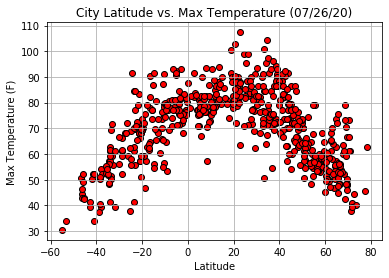

In [93]:
#Scatter plot of city latitude vs. Max Temperature
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(weather.Lat, weather['Max Temp Fahrenheit'], color = 'red', edgecolors = 'black')
plt.title('City Latitude vs. Max Temperature (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('max_temp_latitude.png')

## Latitude vs. Humidity Plot

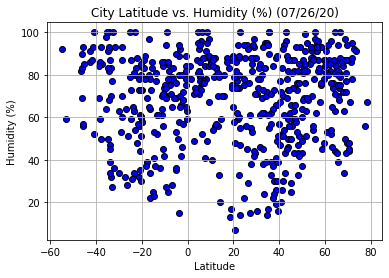

In [94]:
#Scatter plot of city latitude vs. humidity 
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(weather.Lat, weather.Humidity, color = 'blue', edgecolors = 'black')
plt.title('City Latitude vs. Humidity (%) (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('latitude_vs_humidity.png')

## Latitude vs. Cloudiness Plot

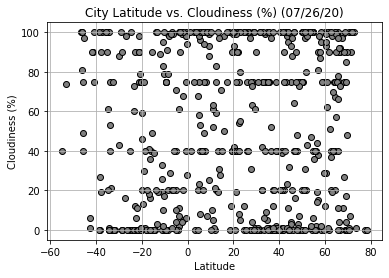

In [95]:
#Scatter plot of city latitude vs. cloudiness 
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(weather.Lat, weather['Cloudiness (%)'], color = 'grey', edgecolors = 'black')
plt.title('City Latitude vs. Cloudiness (%) (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('latitude_vs_cloudiness.png')

## Latitude vs. Wind Speed Plot

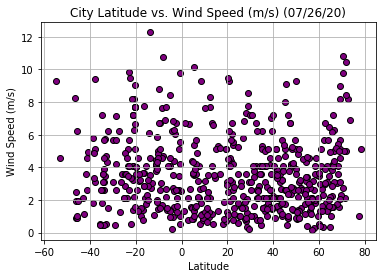

In [97]:
#Scatter plot of city latitude vs. wind speed 
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(weather.Lat, weather['Wind Speed (m/s)'], color = 'purple', edgecolors = 'black')
plt.title('City Latitude vs. Wind Speed (m/s) (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.savefig('latitude_vs_windspeed.png')

## Linear Regression

In [99]:
weather.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date,Max Temp Fahrenheit
0,Rikitea,-23.12,-134.97,293.95,80,12,9.84,PF,1595705224,69.71
1,Ushuaia,-54.80,-68.30,272.15,92,40,9.30,AR,1595705226,30.47
2,Saldanha,-33.01,17.94,288.15,77,0,0.50,ZA,1595705229,59.27
3,Bariloche,-41.15,-71.31,274.15,100,75,4.60,AR,1595705231,34.07
4,Hilo,19.73,-155.09,301.15,65,90,3.10,US,1595705233,82.67


In [132]:
# Create Northern and Southern Hemisphere DataFrames
north = weather[weather.Lat > 0]
south = weather[weather.Lat < 0]
south.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date,Max Temp Fahrenheit
0,Rikitea,-23.12,-134.97,293.95,80,12,9.84,PF,1595705224,69.71
1,Ushuaia,-54.80,-68.30,272.15,92,40,9.30,AR,1595705226,30.47
2,Saldanha,-33.01,17.94,288.15,77,0,0.50,ZA,1595705229,59.27
3,Bariloche,-41.15,-71.31,274.15,100,75,4.60,AR,1595705231,34.07
7,Sola,-13.88,167.55,299.91,81,100,12.26,VU,1595705240,80.44


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [114]:
def linregressplot(x,y):
    (s, i, r, p, ster) = linregress(x,y)
    reg_line = "y = " + str(round(s, 2)) + "x + " + str(round(i, 2))
    regress_values = x*s + i
    

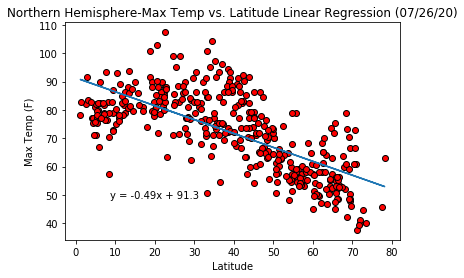

In [126]:
#Map max temp vs latitude for northern hemisphere
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(north.Lat, north['Max Temp Fahrenheit'], color = 'red', edgecolors = 'black')
#Lin regress plot
plt.plot(north.Lat, regress_values)
plt.title('Northern Hemisphere-Max Temp vs. Latitude Linear Regression (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.text(20, 50, reg_line, ha = 'center', va = 'center')
plt.savefig('latitude_vs_temp_north.png')

#Get linear regression for these points, unpack, graph
(s, i, r, p, ster) = linregress(north.Lat, north['Max Temp Fahrenheit'])
reg_line = "y = " + str(round(s, 2)) + "x + " + str(round(i, 2))
regress_values = (north['Lat'])*s + i


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

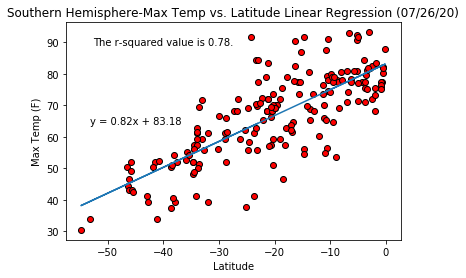

In [141]:
#Southern hemisphere max temp vs latitude##
#Get linear regression for these points, unpack, graph
(s, i, r, p, ster) = linregress(south.Lat, south['Max Temp Fahrenheit'])
r = round(r,2)
reg_line = "y = " + str(round(s, 2)) + "x + " + str(round(i, 2))
regress_values = (south['Lat'])*s + i
#Southern hemisphere max temp vs latitude
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(south.Lat, south['Max Temp Fahrenheit'], color = 'red', edgecolors = 'black')
#Lin regress plot
plt.plot(south.Lat, regress_values)
plt.title('Southern Hemisphere-Max Temp vs. Latitude Linear Regression (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.text(-45, 65, reg_line, ha = 'center', va = 'center')
plt.text(-40, 90, f"The r-squared value is {r}.", ha = 'center', va = 'center')
plt.savefig('latitude_vs_temp_south.png')



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

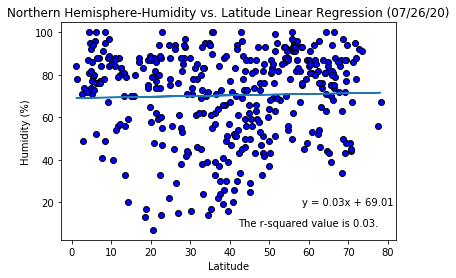

In [159]:
#Northern hemisphere Humidity vs latitude##
#Get linear regression for these points, unpack, graph
(s, i, r, p, ster) = linregress(north.Lat, north.Humidity)
r = round(r,2)
reg_line = "y = " + str(round(s, 2)) + "x + " + str(round(i, 2))
regress_values = (north.Lat)*s + i
#Southern hemisphere max temp vs latitude
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(north.Lat, north.Humidity, color = 'blue', edgecolors = 'black')
#Lin regress plot
plt.plot(north.Lat, regress_values)
plt.title('Northern Hemisphere-Humidity vs. Latitude Linear Regression (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.text(70, 20, reg_line, ha = 'center', va = 'center')
plt.text(60, 10, f"The r-squared value is {r}.", ha = 'center', va = 'center')
plt.savefig('latitude_vs_humidity_north.png')



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

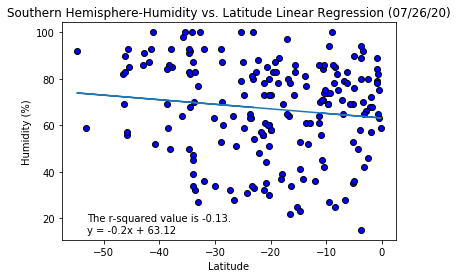

In [158]:
#Southern hemisphere Humidity vs latitude##
#Get linear regression for these points, unpack, graph
(s, i, r, p, ster) = linregress(south.Lat, south.Humidity)
r = round(r,2)
reg_line = "y = " + str(round(s, 2)) + "x + " + str(round(i, 2))
regress_values = (south.Lat)*s + i
#Southern hemisphere max temp vs latitude
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(south.Lat, south.Humidity, color = 'blue', edgecolors = 'black')
#Lin regress plot
plt.plot(south.Lat, regress_values)
plt.title('Southern Hemisphere-Humidity vs. Latitude Linear Regression (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.text(-45, 15, reg_line, ha = 'center', va = 'center')
plt.text(-40, 20, f"The r-squared value is {r}.", ha = 'center', va = 'center')
plt.savefig('latitude_vs_humidity_south.png')



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

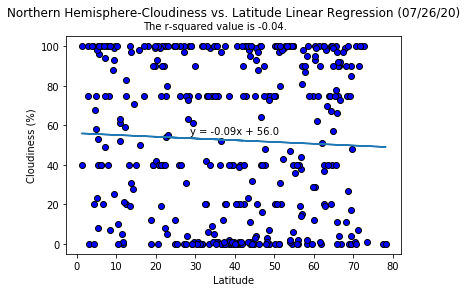

In [182]:
#Northern hemisphere Humidity vs latitude##
#Get linear regression for these points, unpack, graph
(s, i, r, p, ster) = linregress(north.Lat, north['Cloudiness (%)'])
r = round(r,2)
reg_line = "y = " + str(round(s, 2)) + "x + " + str(round(i, 2))
regress_values = (north.Lat)*s + i
#Southern hemisphere max temp vs latitude
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(north.Lat, north['Cloudiness (%)'], color = 'blue', edgecolors = 'black')
#Lin regress plot
plt.plot(north.Lat, regress_values)
plt.title('Northern Hemisphere-Cloudiness vs. Latitude Linear Regression (07/26/20)',pad = 20 )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.text(40, 57, reg_line, ha = 'center', va = 'center')
plt.text(35, 110, f"The r-squared value is {r}.", ha = 'center', va = 'center')
plt.savefig('latitude_vs_cloudiness_north.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

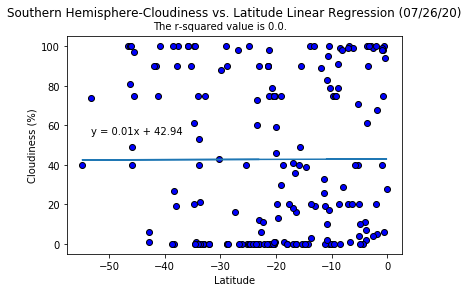

In [181]:
#Southern hemisphere Humidity vs latitude##
#Get linear regression for these points, unpack, graph
(s, i, r, p, ster) = linregress(south.Lat, south['Cloudiness (%)'])
r = round(r,2)
reg_line = "y = " + str(round(s, 2)) + "x + " + str(round(i, 2))
regress_values = (south.Lat)*s + i
#Southern hemisphere max temp vs latitude
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(south.Lat, south['Cloudiness (%)'], color = 'blue', edgecolors = 'black')
#Lin regress plot
plt.plot(south.Lat, regress_values)
plt.title('Southern Hemisphere-Cloudiness vs. Latitude Linear Regression (07/26/20)',pad = 20 )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.text(-45, 57, reg_line, ha = 'center', va = 'center')
plt.text(-30, 110, f"The r-squared value is {r}.", ha = 'center', va = 'center')
plt.savefig('latitude_vs_cloudiness_south.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

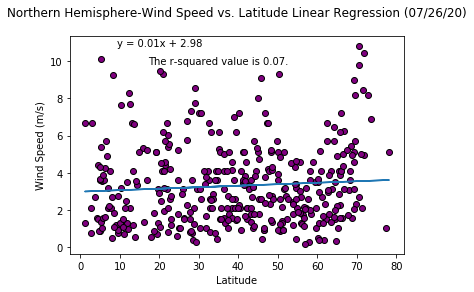

In [187]:
#Northern hemisphere Wind Speed vs latitude##
#Get linear regression for these points, unpack, graph
(s, i, r, p, ster) = linregress(north.Lat, north['Wind Speed (m/s)'])
r = round(r,2)
reg_line = "y = " + str(round(s, 2)) + "x + " + str(round(i, 2))
regress_values = (north.Lat)*s + i
#Northern hemisphere max temp vs latitude
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(north.Lat, north['Wind Speed (m/s)'], color = 'purple', edgecolors = 'black')
#Lin regress plot
plt.plot(north.Lat, regress_values)
plt.title('Northern Hemisphere-Wind Speed vs. Latitude Linear Regression (07/26/20)',pad = 20 )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.text(20, 11, reg_line, ha = 'center', va = 'center')
plt.text(35, 10, f"The r-squared value is {r}.", ha = 'center', va = 'center')
plt.savefig('latitude_vs_windspeed_north.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

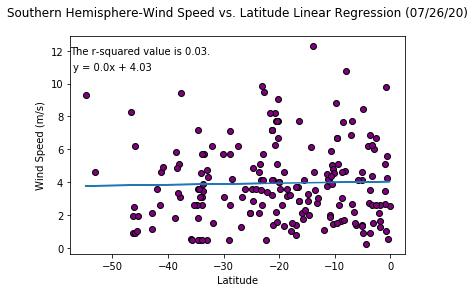

In [195]:
#South hemisphere Wind Speed vs latitude##
#Get linear regression for these points, unpack, graph
(s, i, r, p, ster) = linregress(south.Lat, south['Wind Speed (m/s)'])
r = round(r,2)
reg_line = "y = " + str(round(s, 2)) + "x + " + str(round(i, 2))
regress_values = (south.Lat)*s + i
#Northern hemisphere max temp vs latitude
plt.figure(figsize = (6, 4), edgecolor = 'black')
plt.scatter(south.Lat, south['Wind Speed (m/s)'], color = 'purple', edgecolors = 'black')
#Lin regress plot
plt.plot(south.Lat, regress_values)
plt.title('Southern Hemisphere-Wind Speed vs. Latitude Linear Regression (07/26/20)',pad = 20 )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.text(-50, 11, reg_line, ha = 'center', va = 'center')
plt.text(-45, 12, f"The r-squared value is {r}.", ha = 'center', va = 'center')
plt.savefig('latitude_vs_windspeed_south.png')